# Tarea 1: PCA

## Ejercicio 2

In [ ]:
import numpy as np
X = np.array([[-1,0,1],
             [0,-1,1]])

In [ ]:
def PCA(X , num_componentes):

    X_media = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_media , rowvar = False)

    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:num_componentes]

    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

    return X_red

In [ ]:
X_red=PCA(X,2)
X_red

array([[ 0.70710678,  0.        ],
       [-0.70710678,  0.        ]])

##Ejercicio 3

Importamos primero los datos de wine.data

In [ ]:
import pandas as pd
import numpy as np

archivo = 'wine.csv'
df = pd.read_csv(archivo)
df

In [ ]:
np.mean(df, axis = 0) # Calcula la media por columnas y las muestra en un arreglo

In [ ]:
np.mean(df, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

Preprocesamiento de datos

In [ ]:
# Centramos a los datos y los dividimos entre la desviación estándar

df_media = df - np.mean(df, axis = 0)
df_media


In [ ]:
# Matriz de covarianza muestral

S = np.cov(df_media, rowvar = False) #rowvar=false es para que sea de 5x5, sino seria de 20x20
S


In [ ]:
eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]

eigen_val

In [ ]:
#recordar que esta matriz es ortogonal y tiene asociado un eigenvalor cada eigenvector (cada columna)
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

eigen_vec

In [ ]:
# suponemos que tenemos 2 componentes principales, pero esto formalmente se saca del plt.scree
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]
eigenvector_2

In [ ]:
# Descomposición espectral, es tomar el vector de las componentes principales multiplicado por la matriz Y y luego calculamos la trans
#obtenemos la matriz reducida
#esta matriz reducida ya tiene la info de las componentes principales

df_red = np.dot(eigenvector_2.transpose(),df_media.transpose()).transpose()
df_red

In [ ]:
# Información total

eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))
#esta varianza explicada, cada componente nos dice que porcentaje de la informacion nos da cada columna

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

In [ ]:
# Escribimos lo anterior como función
def PCA(X , num_componentes):

    X_media = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_media , rowvar = False)

    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:num_componentes]

    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

    return X_red

##Ejercicio 4

In [ ]:
import numpy as np

# Definir medias
medias = np.array([0, 0, 0])

# Definir matriz de covarianza
covarianza = np.array([[2, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

# Generar muestra aleatoria
muestra = np.random.multivariate_normal(medias, covarianza, size=100)

print("Muestra aleatoria generada:")
print(muestra)

# Calculamos la matriz de covarianza de la muestra
matriz_cov = np.cov(muestra, rowvar=False)

# Calculamos los eigenvalores y eigenvectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(matriz_cov)

# Imprimimos los eigenvalores y eigenvectores
print("Eigenvalores:")
print(eigenvalues)
print("\nEigenvectores:")
print(eigenvectors)

Muestra aleatoria generada:
[[ 8.21004602e-01  3.16589661e-01 -1.55687678e-01]
 [-8.75236660e-01 -8.49405949e-01 -1.33221140e-01]
 [ 1.79172975e+00 -5.21253889e-01  2.39987959e-01]
 [-7.48243359e-01  2.74237494e-01 -2.75691151e-01]
 [-6.47650413e-02  1.09746355e+00  7.01807853e-01]
 [-3.38466776e-01 -6.03161566e-02 -1.70706178e+00]
 [ 1.12141747e+00  8.14804325e-01  5.47469445e-01]
 [ 1.81336361e+00  1.36622481e+00 -2.80868198e-01]
 [ 1.28524591e-01  1.35028503e+00 -1.14228678e+00]
 [-1.51256253e+00 -1.52898989e-01  1.76332617e-01]
 [ 2.07647434e+00 -5.94692782e-01 -2.16571407e-01]
 [ 3.26560437e+00 -1.78706364e-01  1.50920805e+00]
 [-7.84921030e-01  2.63970560e-01  8.37509374e-01]
 [ 5.32774391e-01 -1.04606118e+00  1.21738727e+00]
 [-2.03207807e-01  1.74528077e-01  8.11634251e-01]
 [-1.51482052e+00  1.01204395e+00  1.45865598e+00]
 [ 7.16499853e-01 -7.85059619e-02 -2.09611689e+00]
 [-2.18111158e+00 -9.81468317e-01 -6.05138858e-01]
 [ 1.38701792e+00  1.44230733e-01 -3.98680989e-01]
 [ 

Varianza explicada por cada componente principal:
[0.51450126 0.2515335  0.23396524]


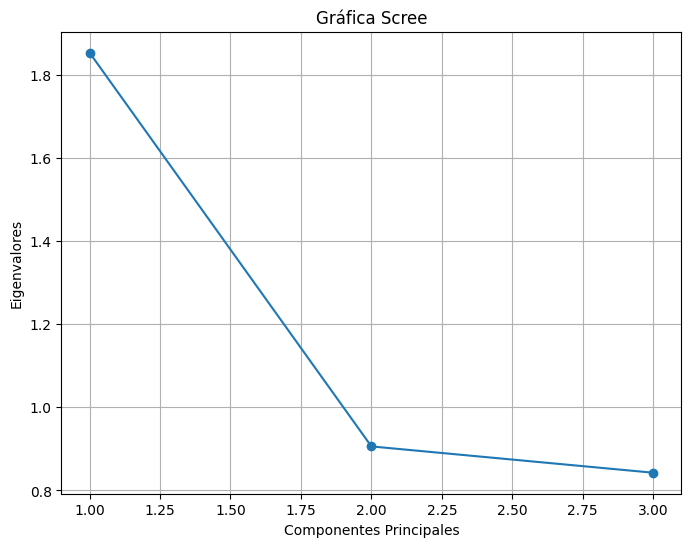

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Creamos un objeto PCA con 3 componentes
pca = PCA(n_components=3)

# Ajustamos el modelo PCA a nuestra muestra
pca.fit(muestra)

# Transformamos nuestra muestra en las nuevas coordenadas de los componentes principales
muestra_pca = pca.transform(muestra)

# Mostramos la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Calculamos los eigenvalores de la matriz de covarianza
eigenvalues, _ = np.linalg.eig(matriz_cov)

# Ordenamos los eigenvalores de mayor a menor
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Creamos la gráfica Scree
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.title('Gráfica Scree')
plt.xlabel('Componentes Principales')
plt.ylabel('Eigenvalores')
plt.grid(True)
plt.show()


## Ejercicio 5

In [ ]:
import numpy as np
#Definir X
X=np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])
X

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
# Su matriz de covarianzas
X_media = X - np.mean(X , axis = 0)
Cov_X = np.cov(X_media, rowvar = False)
print(Cov_X)

[[0.         0.         0.         0.        ]
 [0.         0.25       0.16666667 0.08333333]
 [0.         0.16666667 0.33333333 0.16666667]
 [0.         0.08333333 0.16666667 0.25      ]]


In [ ]:
#Definir A
A=np.array([[3,2,1],[2,4,2],[1,2,3]])
A

array([[3, 2, 1],
       [2, 4, 2],
       [1, 2, 3]])

In [ ]:
# Su matriz de covarianzas
A_media = A - np.mean(A , axis = 0)
Cov_A = np.cov(A_media, rowvar = False)
print(Cov_A)

[[ 1.          0.         -1.        ]
 [ 0.          1.33333333  0.        ]
 [-1.          0.          1.        ]]


In [ ]:
# Eigenvalores y eigenvectores de X
eigen_val, eigen_vec = np.linalg.eigh(Cov_X)
eigen_val

array([0.        , 0.09763107, 0.16666667, 0.56903559])

In [ ]:
# Eigenvalores y eigenvectores de A
eigen_val, eigen_vec = np.linalg.eigh(Cov_A)
eigen_val

array([0.        , 1.33333333, 2.        ])

No es lo mismo, ya que tienen difrentes eigenvalores.

In [ ]:
eigen_val , eigen_vec = np.linalg.eigh(Cov_X)

sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenval = eigen_val[sorted_index]
sorted_eigenval

array([0.56903559, 0.16666667, 0.09763107, 0.        ])

In [ ]:
sorted_eigenvec = eigen_vec[:,sorted_index]

#segundo eje principal
segundo_ejep = sorted_eigenvec[:, 1]
print("El Segundo Eje Principal es:")
segundo_ejep

El Segundo Eje Principal es:


array([-0.00000000e+00, -7.07106781e-01,  2.77555756e-16,  7.07106781e-01])

In [ ]:
# Proyectar de datos originales sobre segundo eje principal
proyecc = np.dot(X, segundo_ejep)

# coordenadas
print("Coordenadas sobre el segundo eje principal:")
print(proyecc)

Coordenadas sobre el segundo eje principal:
[ 0.00000000e+00 -7.07106781e-01 -7.07106781e-01  1.66533454e-16]


##Ejercicio 6

In [ ]:
import numpy as np
S=np.array([[140.017, 107.881, 139.068, 109.095],
    [107.881,106.038,110.0439,82.627],
    [139.068,110.0439,168.752,125.136],
    [109.095,82.627,125.136,108.60]])
X = np.array([[0.969,-0.102,0.194,0.116],
             [0.907,-0.392,-0.106,-0.111],
              [0.971,0.156,-0.157,0.092],
              [0.943,0.252,0.092,-0.196]])

#Matriz de covarianzas
eigen_valores, eigen_vectores = np.linalg.eigh(S)
eigen_valores = eigen_valores[np.argsort(eigen_valores)[::-1]]
eigen_vectores = eigen_vectores[:,np.argsort(eigen_valores)[::-1]]
cov1=np.dot(eigen_vectores[0],eigen_valores[0])
cov2=np.dot(eigen_vectores[1],eigen_valores[1])
cov3=np.dot(eigen_vectores[2],eigen_valores[2])
cov4=np.dot(eigen_vectores[3],eigen_valores[3])
covx= np.array([cov1,cov2,cov3,cov4])
covx = covx.reshape(4,4)
covx=covx.transpose()

r2_1=np.dot((eigen_vectores[0]**2),eigen_valores[0])/S[0][0]
r2_2=np.dot((eigen_vectores[1]**2),eigen_valores[1])/S[1][1]
r2_3=np.dot((eigen_vectores[2]**2),eigen_valores[2])/S[2][2]
r2_4=np.dot((eigen_vectores[3]**2),eigen_valores[3])/S[3][3]
r2=np.array([r2_1,r2_2,r2_3,r2_4])
r2=r2.transpose()
var1= sum(S[i][i]*r2[i][0] for i in range(0,4))
var2= sum(S[i][i]*r2[i][1] for i in range(0,4))
var3= sum(S[i][i]*r2[i][2] for i in range(0,4))
var4= sum(S[i][i]*r2[i][3] for i in range(0,4))
var_ec=np.array([var1,var2,var3,var4])
print('La varianza empirica de las componentes principales es:')
var_ec

La varianza empirica de las componentes principales es:


array([396.38610945,  40.11919419,   8.20636425,  11.04117772])

In [ ]:
#Ahora para calcular la parte de la varianza de ξ1 explicada por las dos últimas componentes principales
VE1= (var_ec[2]+var_ec[3])/np.trace(S)

#Y para calcular calcular la parte de la varianza de ξ2 explicada por las dos primeras componentes principales
VE2= (var_ec[0]+var_ec[1])/np.trace(S)

print(f'La parte de la varianza de ξ1 explicada por las dos últimas componentes principales es: {VE1}')
print(f'La parte de la varianza de ξ2 explicada por las dos primeras componentes principales es: {VE2}')

La parte de la varianza de ξ1 explicada por las dos últimas componentes principales es: 0.036773566207830025
La parte de la varianza de ξ2 explicada por las dos primeras componentes principales es: 0.8339691743505554


In [ ]:
# Proyección de los datos sobre los dos primeros ejes principales
sorted_index = np.argsort(eigen_valores)[::-1]
sorted_eigenvalores = eigen_valores[sorted_index]
sorted_eigenvectores = eigen_vectores[:,sorted_index]

#segundo eje principal
segundo_ejep = sorted_eigenvectores[:, 1]
print("El Segundo Eje Principal es:")
segundo_ejep

El Segundo Eje Principal es:


array([-0.68108862,  0.33271627,  0.59007269, -0.27790717])

In [ ]:
proyecc = np.dot(X, segundo_ejep)

# coordenadas
print("Coordenadas sobre el segundo eje principal:")
print(proyecc)

Coordenadas sobre el segundo eje principal:
[-0.61167506 -0.77987217 -0.72764218 -0.44966557]


## Ejercicio 8

In [ ]:
import pandas as pd
import numpy as np

# Definir los datos
hembras = {
    'Sex': ['f'] * 24,
    'Length': [98, 103, 103, 105, 109, 123, 123, 133, 133, 133, 134, 136, 137, 138, 141, 147, 149, 153, 155, 155, 158, 159, 162, 177],
    'Width': [81, 84, 86, 86, 88, 92, 95, 99, 102, 102, 100, 102, 98, 99, 105, 108, 107, 107, 115, 117, 115, 118, 124, 132],
    'Height': [38, 38, 42, 40, 44, 50, 46, 51, 51, 51, 48, 49, 51, 51, 53, 57, 55, 56, 63, 60, 62, 63, 61, 67]
}
# Definir los datos
machos = {
    'Sex': ['m'] * 24,
    'Length': [93, 94, 96, 101, 102, 103, 104, 106, 107, 112, 113, 114, 116, 117, 117, 119, 120, 120, 121, 125, 127, 128, 131, 135],
    'Width': [74, 78, 80, 84, 85, 81, 83, 83, 82, 89, 88, 86, 90, 90, 91, 93, 89, 93, 95, 93, 96, 95, 95, 106],
    'Height': [37, 35, 35, 39, 38, 37, 39, 39, 38, 40, 40, 40, 43, 41, 41, 41, 40, 44, 42, 45, 45, 45, 46, 47]
}

dff = pd.DataFrame(hembras)
dfm = pd.DataFrame(machos)
df1= np.log(dff[['Length', 'Width', 'Height']])
df2= np.log(dfm[['Length', 'Width', 'Height']])
lognm=df2.values
lognf=df1.values
datosf=np.array(lognf)
datosm=np.array(lognm)
vectormediof=datosf-np.mean(datosf,axis=0) #Centramos los datos
vectormediom=datosm-np.mean(datosm,axis=0)
cov_f=np.cov(vectormediof, rowvar=False)
cov_m=np.cov(vectormediom, rowvar=False)
eigenvaloresf, eigenvectoresf=np.linalg.eigh(cov_f)
eigenvaloresm, eigenvectoresm=np.linalg.eigh(cov_m)
evsfW=eigenvaloresf[::-1]
evsmW=eigenvaloresm[::-1]
evfW=eigenvectoresf[:,np.argsort(eigenvaloresf)[::-1]]
evmW=eigenvectoresm[:,np.argsort(eigenvaloresm)[::-1]]
n = 3
eigenvectorf2 = evfW[:,0:n]
eigenvectorm2 = evmW[:,0:n]
datosfred=np.dot(eigenvectorf2.transpose(),vectormediof.transpose()).transpose()
datosmred=np.dot(eigenvectorm2.transpose(),vectormediom.transpose()).transpose()
F=pd.DataFrame(datosfred,columns=['PC1','PC2','PC3'])
M=pd.DataFrame(datosmred,columns=['PC1','PC2','PC3'])

print("PCA Hembras")
print(F)
print("PCA Machos")
print(M)


PCA Hembras
         PC1       PC2       PC3
0   0.491814  0.001752  0.013430
1   0.443245 -0.036014  0.009742
2   0.370284  0.033017  0.031693
3   0.388332 -0.014156  0.017578
4   0.295304  0.034322  0.015118
5   0.119952  0.061507 -0.022715
6   0.155715 -0.017488 -0.001199
7   0.023633  0.011044 -0.015271
8   0.009182 -0.001364  0.007716
9   0.009182 -0.001364  0.007716
10  0.051403 -0.044282 -0.014624
11  0.019913 -0.043019 -0.008021
12  0.010109  0.001775 -0.041960
13  0.000669 -0.005755 -0.038774
14 -0.064861 -0.009709 -0.005690
15 -0.149190  0.016908 -0.007752
16 -0.131123 -0.013503 -0.024889
17 -0.158693 -0.011372 -0.041070
18 -0.274136  0.045496  0.010689
19 -0.252467 -0.000089  0.022098
20 -0.276222  0.024171 -0.002132
21 -0.302457  0.023196  0.014292
22 -0.318250 -0.031330  0.039344
23 -0.461335 -0.023745  0.034681
PCA Machos
         PC1       PC2       PC3
0   0.268473  0.061069 -0.000407
1   0.263345 -0.015724  0.006686
2   0.236046 -0.034121  0.007428
3   0.119923  0.0141

In [ ]:
VolF=np.sum(datosf,axis=1)
VolM=np.sum(datosm, axis=1)
print("Volumen tortugas hembra")
print(VolF)
print("Volumen tortugas macho")
print(VolM)

Volumen tortugas hembra
[12.61700279 12.70313195 12.8267459  12.7971871  12.95287433 13.24599594
 13.19470264 13.41729461 13.44714757 13.44714757 13.374211   13.429448
 13.43677404 13.45419917 13.57301215 13.71561508 13.68410833 13.72861845
 13.93149197 13.89994361 13.93466155 13.98272355 14.01875177 14.26364427]
Volumen tortugas macho
[12.4475825  12.45535167 12.50172289 12.70949896 12.70521023 12.64009606
 12.72679315 12.74584135 12.71713424 12.8960147  12.89360409 12.8794252
 13.01459998 12.97555567 12.98660551 13.02529505 12.96500757 13.10428087
 13.08733706 13.16757572 13.21519777 13.21256965 13.25771561 13.41886147]
